In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/sample_submission.csv
/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_test.csv
/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_train.csv


In [ ]:
# https://www.kaggle.com/competitions/copy-of-wheet-variety-prediction-svm-b1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_train.csv")
test = pd.read_csv("/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_test.csv")
ss = pd.read_csv("/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/sample_submission.csv")
data.head()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.,Type
0,1,18.59,16.05,0.9066,6.037,3.860,6.001,5.877,2
1,2,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
2,3,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
3,4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795,2
4,5,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,2


In [6]:
X = data.drop(['Type'], axis = 1)
y = data.loc[:, 'Type']
X.head()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.
0,1,18.59,16.05,0.9066,6.037,3.860,6.001,5.877
1,2,11.18,12.72,0.8680,5.009,2.810,4.051,4.828
2,3,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
3,4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795
4,5,19.15,16.45,0.8890,6.245,3.815,3.084,6.185


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [71]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
testdata_sc = sc.transform(test)

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [73]:
model = SVC(kernel='linear', C=1)

In [74]:
model.fit(X_train_sc, y_train)

SVC(C=1, kernel='linear')

In [75]:
accuracy_score(model.predict(X_test_sc), y_test)

0.9714285714285714

In [77]:
preds = model.predict(testdata_sc)
preds

array([2, 3, 1, 1, 3, 2, 1, 2, 1, 2, 3, 1, 2, 2, 3, 3, 2, 2, 3, 1, 3, 1,
       3, 2, 3, 1, 3, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       1, 2, 3, 1, 3, 2, 3, 1, 1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1,
       2, 3, 2, 1])

In [ ]:
# ok now we explore all the parameters while keeping randomstate constant

'''
c_values
kernel
degree
gamma
shrinking
probabilty
tolerance
weights
max iterations
shape
verbose
'''

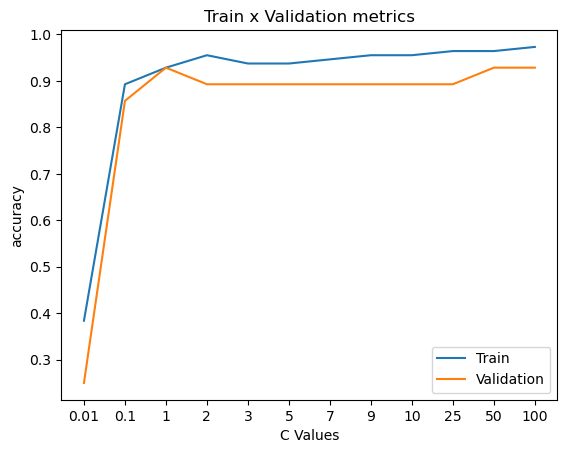

In [19]:
c_values = [0.01, 0.1, 1, 2, 3, 5, 7, 9, 10, 25, 50, 100]
accuracy_list_train = []
accuracy_list_test = []

for i in c_values:
    model = SVC(kernel='linear', C=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('C Values')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(c_values )),labels=c_values)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# Thus best value of C is 1

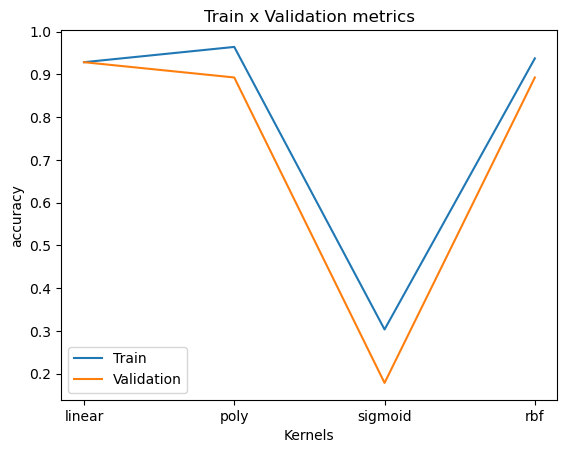

In [21]:
# precomputed cant be used since it requires the data needs to be a sqare matrix 

kernels = ['linear', 'poly', 'sigmoid', 'rbf']

accuracy_list_train = []
accuracy_list_test = []

for i in kernels:
    model = SVC(kernel=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('Kernels')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(kernels)),labels=kernels)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# Linear is the best kernel

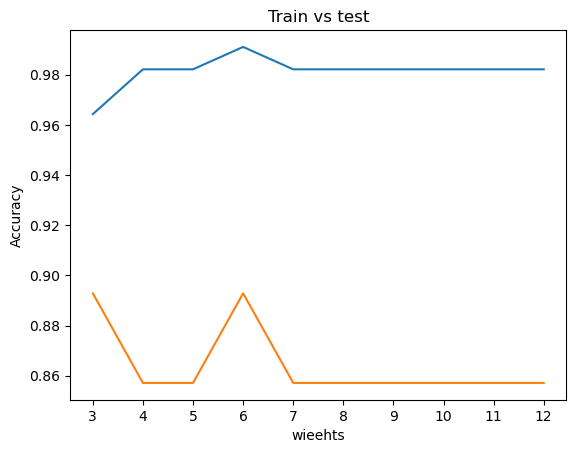

In [22]:
degrees = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

accuracy_list_train = []
accuracy_list_test = []

for i in degrees:
    model = SVC(kernel='poly', degree=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title("Train vs test")
plt.xlabel("wieehts")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(degrees)), labels=degrees)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# For poly kernel, 3 and 6 degree poly will be optimal

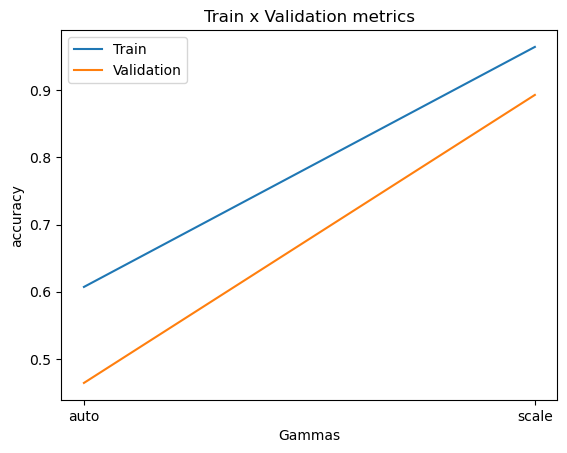

In [40]:
gammas = ['auto', 'scale']

accuracy_list_train = []
accuracy_list_test = []

for i in gammas:
    model = SVC(kernel='poly', gamma=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('Gammas')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(gammas)),labels=gammas)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# Scale will be the optimal gamma here

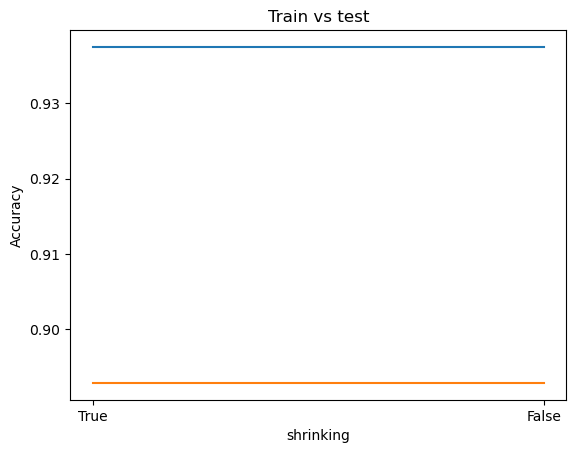

In [42]:
shrinking = [True, False]

accuracy_list_train = []
accuracy_list_test = []

for i in shrinking:
    model = SVC(shrinking=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title("Train vs test")
plt.xlabel("shrinking")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(shrinking)), labels=shrinking)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# Shrinking doesnt influence our accuracy for our data

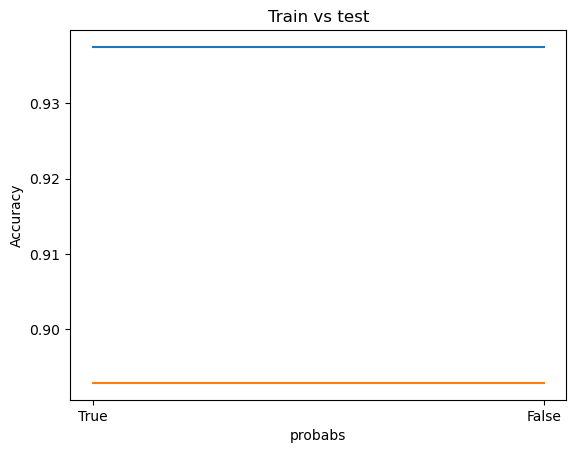

In [44]:
probabs = [True, False]

accuracy_list_train = []
accuracy_list_test = []

for i in probabs:
    model = SVC(probability=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title("Train vs test")
plt.xlabel("probabs")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(probabs)), labels=probabs)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [27]:
# Probabililty also doesnt influence our accuracy for our data

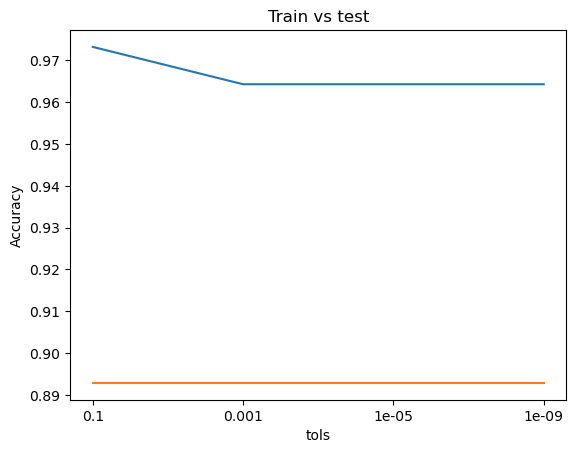

In [45]:
tols = [1e-1, 1e-3, 1e-5, 1e-9]

accuracy_list_train = []
accuracy_list_test = []

for i in tols:
    model = SVC(kernel='poly', tol=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title("Train vs test")
plt.xlabel("tols")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(tols)), labels=tols)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# tol = 0.1 seems to be the optimal value

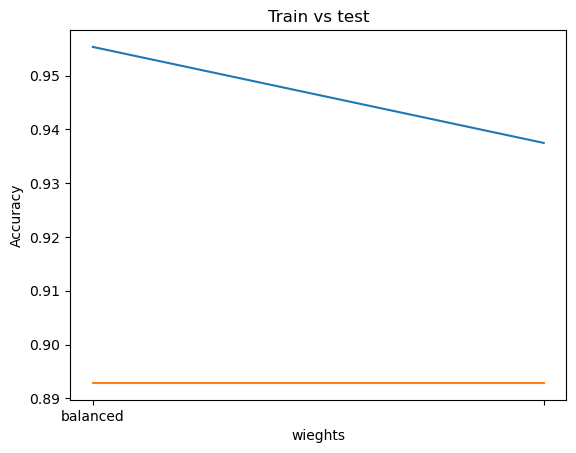

In [30]:
wieghts = ['balanced', None]

accuracy_list_train = []
accuracy_list_test = []

for i in wieghts:
    model = SVC(class_weight=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title("Train vs test")
plt.xlabel("wieghts")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(wieghts)), labels=wieghts)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# Balanced weight provides better result

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


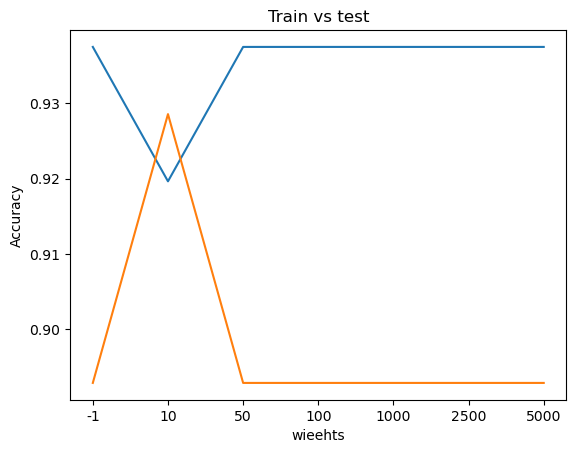

In [31]:
max_iters = [-1, 10, 50, 100, 1000, 2500, 5000]

accuracy_list_train = []
accuracy_list_test = []

for i in max_iters:
    model = SVC(max_iter=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title("Train vs test")
plt.xlabel("wieehts")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(max_iters)), labels=max_iters)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [32]:
# we can keep max interations as default

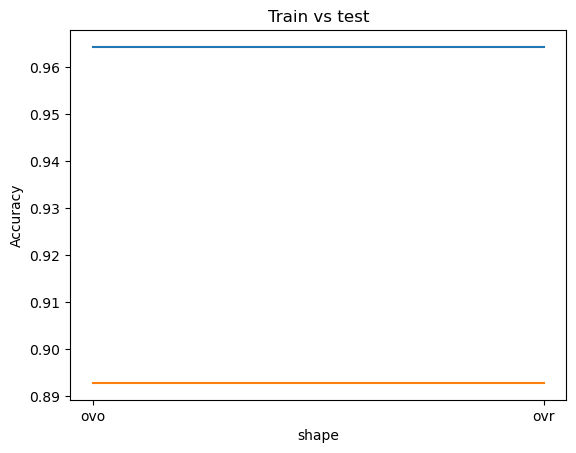

In [35]:
shape = ['ovo', 'ovr']

accuracy_list_train = []
accuracy_list_test = []

for i in shape:
    model = SVC(kernel='poly', decision_function_shape=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title("Train vs test")
plt.xlabel("shape")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(shape)), labels=shape)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# Changing of shape doesnt affect our model

[LibSVM]...*.*
optimization finished, #iter = 307
obj = -3.564234, rho = -3.213646
nSV = 10, nBSV = 2
..*.*
optimization finished, #iter = 257
obj = -11.179338, rho = 0.930433
nSV = 17, nBSV = 12
*
optimization finished, #iter = 18
obj = -0.099478, rho = 1.295436
nSV = 5, nBSV = 0
Total nSV = 28
[LibSVM]...*.*
optimization finished, #iter = 307
obj = -3.564234, rho = -3.213646
nSV = 10, nBSV = 2
..*.*
optimization finished, #iter = 257
obj = -11.179338, rho = 0.930433
nSV = 17, nBSV = 12
*
optimization finished, #iter = 18
obj = -0.099478, rho = 1.295436
nSV = 5, nBSV = 0
Total nSV = 28
[LibSVM]...*.*
optimization finished, #iter = 307
obj = -3.564234, rho = -3.213646
nSV = 10, nBSV = 2
..*.*
optimization finished, #iter = 257
obj = -11.179338, rho = 0.930433
nSV = 17, nBSV = 12
*
optimization finished, #iter = 18
obj = -0.099478, rho = 1.295436
nSV = 5, nBSV = 0
Total nSV = 28
[LibSVM]...*.*
optimization finished, #iter = 307
obj = -3.564234, rho = -3.213646
nSV = 10, nBSV = 2
..*.*
o

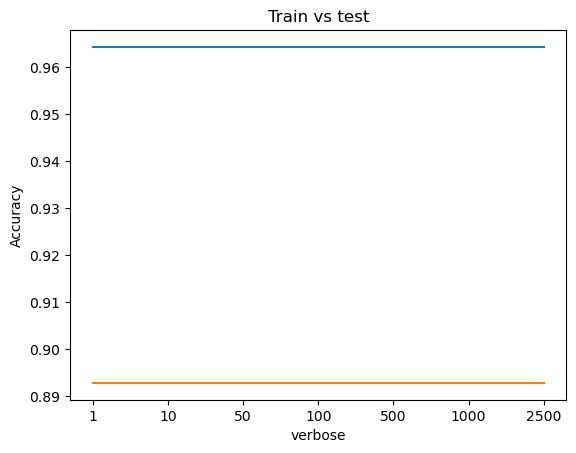

In [36]:
verbs = [1, 10, 50, 100, 500, 1000, 2500]

accuracy_list_train = []
accuracy_list_test = []

for i in verbs:
    model = SVC(kernel='poly', verbose=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title("Train vs test")
plt.xlabel("verbose")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(verbs)), labels=verbs)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [38]:
# Varying verbose also doesnt afftect our model

In [29]:
final_model = SVC(C=1, kernel='poly', degree=3, gamma='scale', shrinking=True, 
                  probability=True, tol=0.1, class_weight='balanced', 
                  max_iter=-1, decision_function_shape='ovr', verbose=1)

In [30]:
final_model.fit(X_train_sc, y_train)

[LibSVM]*.*
optimization finished, #iter = 105
obj = -2.590364, rho = 3.086838
nSV = 9, nBSV = 2
Total nSV = 9
.
*
optimization finished, #iter = 108
obj = -2.989765, rho = 1.994680
nSV = 10, nBSV = 1
Total nSV = 10
*.*
optimization finished, #iter = 80
obj = -1.194730, rho = 4.345583
nSV = 7, nBSV = 0
Total nSV = 7
*.*
optimization finished, #iter = 55
obj = -0.758743, rho = 3.872221
nSV = 10, nBSV = 0
Total nSV = 10
.
*
optimization finished, #iter = 100
obj = -3.521788, rho = 2.592381
nSV = 8, nBSV = 1
Total nSV = 8
*..*
optimization finished, #iter = 146
obj = -3.581658, rho = -3.047749
nSV = 10, nBSV = 2
*
optimization finished, #iter = 43
obj = -8.755103, rho = -1.360852
nSV = 14, nBSV = 9
Total nSV = 14
*
optimization finished, #iter = 32
obj = -8.101467, rho = -1.036168
nSV = 15, nBSV = 9
Total nSV = 15
*.*
optimization finished, #iter = 86
obj = -8.210327, rho = -0.783416
nSV = 17, nBSV = 10
Total nSV = 17
*.*
optimization finished, #iter = 83
obj = -7.192384, rho = -0.557965


SVC(C=1, class_weight='balanced', kernel='poly', probability=True, tol=0.1,
    verbose=1)

In [31]:
accuracy_score(final_model.predict(X_test_sc), y_test)

0.8928571428571429

In [18]:
final_pred = final_model.predict(testdata_sc)
final_pred

array([2, 3, 1, 1, 3, 2, 1, 2, 1, 2, 3, 1, 2, 2, 3, 3, 2, 2, 3, 1, 3, 1,
       3, 2, 3, 1, 3, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       1, 2, 3, 1, 3, 2, 3, 1, 1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 3, 2, 1])

In [80]:
ids = ss.loc[:, 'ID']

df = pd.DataFrame({"ID" : ids,
                  "Type": final_pred})

In [79]:
df.to_csv("submission4.csv", index=False)